In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [10]:
import pandas as pd
s = pd.Series(['0.55', '2', -3, '1234t1s1'])
pd.to_numeric(s, downcast='integer',errors='coerce' )

0    0.55
1    2.00
2   -3.00
3     NaN
dtype: float64

In [11]:
s

0        0.55
1           2
2          -3
3    1234t1s1
dtype: object

In [2]:
df = pd.read_csv('DSM/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,stationID,date,vis,day_type,dir,speed,dir_max,speed_max,unknown,runway_visual_range,HrMn
0,14933KDSM,20060101,0.142,N,87,5,100,6,31,60+,0711
1,14933KDSM,20060101,0.142,N,85,5,87,5,31,60+,0712
2,14933KDSM,20060101,0.143,N,87,5,96,7,31,60+,0713
3,14933KDSM,20060101,0.139,N,91,5,94,6,31,60+,0714
4,14933KDSM,20060101,0.141,N,90,5,87,5,31,60+,0715
5,14933KDSM,20060101,0.142,N,86,5,90,7,31,60+,0716
6,14933KDSM,20060101,0.142,N,81,5,66,5,31,60+,0717
7,14933KDSM,20060101,0.143,N,83,5,98,6,31,60+,0718
8,14933KDSM,20060101,0.144,N,83,5,73,5,31,60+,0719
9,14933KDSM,20060101,0.146,N,75,5,70,5,31,60+,0720


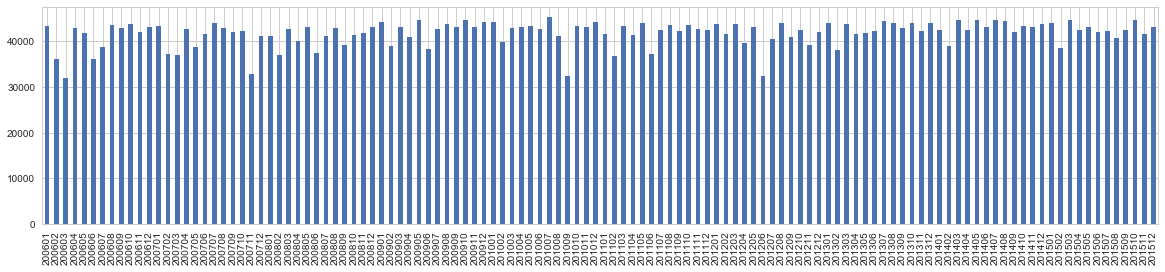

In [5]:
df['year'] = df['date'].apply(lambda x: str(x)[:6])
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [6]:
display(df[df.duplicated('date')])

,stationID,date,vis,day_type,dir,speed,dir_max,speed_max,unknown,runway_visual_range,HrMn,year
1,14933KDSM,20060101,0.142,N,85,5,87,5,31,60+,0712,200601
2,14933KDSM,20060101,0.143,N,87,5,96,7,31,60+,0713,200601
3,14933KDSM,20060101,0.139,N,91,5,94,6,31,60+,0714,200601
4,14933KDSM,20060101,0.141,N,90,5,87,5,31,60+,0715,200601
5,14933KDSM,20060101,0.142,N,86,5,90,7,31,60+,0716,200601
6,14933KDSM,20060101,0.142,N,81,5,66,5,31,60+,0717,200601
7,14933KDSM,20060101,0.143,N,83,5,98,6,31,60+,0718,200601
8,14933KDSM,20060101,0.144,N,83,5,73,5,31,60+,0719,200601
9,14933KDSM,20060101,0.146,N,75,5,70,5,31,60+,0720,200601
10,14933KDSM,20060101,0.151,N,70,4,74,5,31,60+,0721,200601


In [1]:
gmm_em_result = [[0.670,-6.409,-4.276,9.773,10.219,-0.200],
[0.202,2.084,9.018,6.664,6.80,-0.108],
[0.128,9.989,-12.887,7.075,6.579,-0.311]]

GMM Plot Result
0.67 [[-6.409 -4.276]] [  8.9165126   10.97430149] -141.291100141
0.202 [[ 2.084  9.018]] [ 6.35181112  7.09248839] -140.298060175
0.128 [[  9.989 -12.887]] [ 5.63939026  7.84449766] -128.417088453


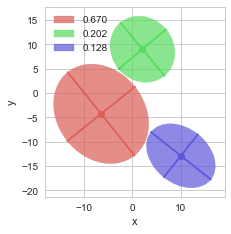

In [4]:
plot_gmm_ellipses(gmm_em_result)

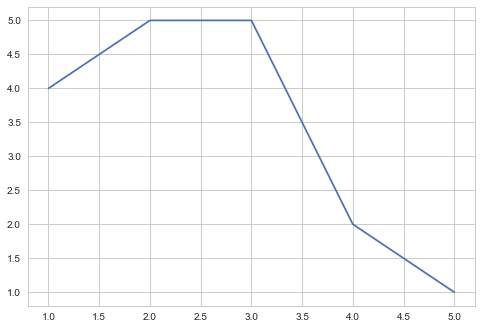

In [8]:
x=[1,2,3,4,5]
y=[4,5,5,2,1]
plot(x,y,'-')
plt.gca().set_xlim([1, 5])

In [2]:
file_path = './data/NCDC/uk/tiree/dat.txt'
df = pd.read_csv(file_path,header=0, skipinitialspace=True)
df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
df = df[['date','HrMn','type','dir','speed','wind_type' ]]

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 20000000) & (date < 20160000) ")

In [4]:
# df = pd.read_csv('DSM/DSM.csv',header=0, skipinitialspace=True, dtype={'HrMn': object})
# df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
# df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
# df['dir_max']=pd.to_numeric(df['dir_max'], downcast='integer', errors='coerce')
# df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
# df = df.dropna()
# df=df[['date','HrMn','dir','speed','dir_max','speed_max']]

In [5]:
# df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
# df.dir = np.radians(df.dir)
# temp_df =df.groupby(['date', 'Hr']).agg({'speed' : np.mean,'dir': sp.stats.circmean,'speed_max': np.max}).reset_index()
# df.dir = np.degrees(df.dir)
# temp_df.dir = np.degrees(temp_df.dir)
# temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)

In [6]:
df

,date,HrMn,type,dir,speed,wind_type
208443,20000101,0,FM-12,260,5.7,N
208444,20000101,100,FM-12,250,5.1,N
208445,20000101,200,FM-12,250,4.6,N
208446,20000101,300,FM-12,250,6.2,N
208447,20000101,400,FM-12,230,5.7,N
208448,20000101,500,FM-12,230,7.7,N
208449,20000101,600,FM-12,230,9.3,N
208450,20000101,700,FM-12,220,8.7,N
208451,20000101,800,FM-12,210,9.3,N
208452,20000101,900,FM-12,210,9.3,N


In [7]:
def fit_weibul(df_speed):
    max_speed = df_speed.max()
    x = linspace(0, max_speed)
    data_size = len(df_speed)
    
    df_speed.hist(bins=arange(0, max_speed), alpha=0.5, label='Data', normed=True)  

    weibull_params = sp.stats.exponweib.fit(df_speed, floc=0, f0=1)
    y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
    plot(x, y_weibull, '--', color='black',label='Weibull') 

In [8]:
temp_df = df

In [9]:
for time_limit in [0, 20050000, 20100000]:
    plt.figure()
    df_speed=temp_df.query('date > @time_limit')['speed']
    fit_weibul(df_speed)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeEAAAFMCAYAAAD8yAQ+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl8VOWh//HvLEkImZCRLYASlghYBC8kLIIiSA24oSLa
ABa0eAVrEbmCC1IQIYVYxKWIfVmrttIiKNqW2NL+BPViES2MBgrIUsQUZJHFAEmALDP3D8z8GhMy
CSR55pzzef+VmZPMfJ8c5ZvnzHnOcYVCoZAAAECDc5sOAACAU1HCAAAYQgkDAGAIJQwAgCGUMAAA
hlDCAAAYUqMS3rhxo8aMGVPp+ffee08jRoxQZmam3njjjToPBwCAnXkjfcNLL72kFStWKD4+vsLz
JSUlmjdvnpYvX674+HiNGjVKgwcPVvPmzestLAAAdhJxJpySkqKFCxdWen7Xrl1KSUlRUlKSYmNj
lZ6ervXr19dLSAAA7CjiTHjo0KHau3dvpecLCgqUmJgYfpyQkKCCgoKIbxgIBGoZEQAA60tPT6/0
XMQSPhufz6fCwsLw48LCwgqlXNsg5yoQCNTp60U7xmtvThqvk8YqMV47q8lYzzYBPeezo1NTU5WX
l6f8/HwVFxdrw4YN6tmz57m+HAAAjlPrmXBOTo6KioqUmZmpRx99VHfffbdCoZBGjBih5OTk+sgI
AIAt1aiEL7roovASpGHDhoWfHzx4sAYPHlw/yQAAsDku1gEAgCGUMAAAhlDCAAAYQgkDAGAIJQwA
gCGUMAAAhlDCAAAYQgkDAGAIJQwAgCGWLuG33npLAwcO1K9//WvTUQAAqDVLl3BsbKwKCwuVn59v
OgoAALVm6RJOSkqSJB07dsxwEgAAas8WJcxMGABgRZYuYb/fL4mZMADAmixdwk2bNtU111yjvn37
mo4CAECt1eh+wtEqMTFR2dnZSk9PNx0FAIBas/RMuFwoFDIdAQCAWrN8CY8cOVIXX3yx6RgAANSa
5UtYko4ePWo6AgAAtWb5Evb5fDp+/LiCwaDpKAAA1IrlSzgxMVHBYFAFBQWmowAAUCuWL2GfzyeJ
tcIAAOux9BIlSUpLS1OrVq3k9Vp+KAAAh7F8cw0fPpx1wgAAS7L84WjpzDphTswCAFiN5Uv4nXfe
UVxcnF5//XXTUQAAqBXLl3BsbKxKSko4MQsAYDmWL+Hys6O5nSEAwGosX8KJiYmSWKIEALAey5cw
64QBAFZl+RK+4IIL9MMf/pB7CgMALMfy64T9fr8WL15sOgYAALVm+ZlwudLSUtMRAACoFVuUcEpK
ii677DLTMQAAqBVblHBsbCwnZgEALMcWJez3+1knDACwHFuUcFJSkoqKilRSUmI6CgAANWabEpZY
KwwAsBbLL1GSpKFDhyo5OVluty3+pgAAOIQtSnjChAmmIwAAUGu2mTqWlpayVhgAYCm2KOHnn39e
MTExysnJMR0FAIAas0UJJyQkSOJ2hgAAa7FFCfv9fkmcHQ0AsBZblDBLlAAAVmSLEi6fCXM4GgBg
JbYo4TZt2uiee+5Rv379TEcBAKDGbLFOuFWrVvrVr35lOgYAALVii5mwJAWDQZ08edJ0DAAAasw2
Jez3+3XllVeajgEAQI3ZpoQTExM5OxoAYCm2KeGkpCRKGABgKRFLOBgMaubMmcrMzNSYMWOUl5dX
YfuKFSs0fPhwjRgxQkuWLKm3oJEkJSUpPz9foVDIWAYAAGojYgmvWrVKxcXFWrZsmaZMmaLs7OwK
23/+85/r1Vdf1euvv65XX33V2GzU7/ertLSUk7MAAJYRcYlSIBDQgAEDJEk9evTQ5s2bK2zv0qWL
Tpw4Ia/Xq1AoJJfLVT9JI7j55pt1ySWXKBgMGnl/AABqK2IJFxQUyOfzhR97PB6VlpbK6z3zo506
ddKIESMUHx+vjIwMNWnSJOKbBgKB84hc9ev17t1bvXv31vbt2+v0taNRXf/+oh3jtS8njVVivHZ2
rmONWMI+n0+FhYXhx8FgMFzA27Zt0wcffKDVq1ercePGeuihh7Ry5Updd9111b5menr6OYWtSiAQ
UHp6ukKhkE6ePKmYmBjFxMTU2etHm/LxOgXjtS8njVVivHZWk7GeraQjfiaclpamNWvWSJJyc3PV
uXPn8LbExEQ1atRIcXFx8ng8atq0qY4fP16b7HXmySefVEJCglavXm3k/QEAqK2IM+GMjAytXbtW
I0eOVCgU0ty5c5WTk6OioiJlZmYqMzNTo0ePVkxMjFJSUjR8+PCGyF1J+WFwlikBAKwiYgm73W7N
nj27wnOpqanhr0eNGqVRo0bVfbJaKr+dIXdSAgBYhW0u1lF+O0NmwgAAq7BNCZfPhClhAIBV2KaE
27Vrp4kTJ+ryyy83HQUAgBqxxf2EJalt27ZauHCh6RgAANSYbWbCknT69GkORwMALMM2JRwKhdS4
cWPdeOONpqMAAFAjtilhl8ulJk2aMBMGAFiGbUpYOrNMiXXCAACrsFUJJyUlMRMGAFiG7Ur4+PHj
KisrMx0FAICIbLNESTpzCc0rrrhCZWVl8ng8puMAAFAtW5XwvffeazoCAAA1ZqvD0WVlZTp69KiK
i4tNRwEAICJblfCsWbPUrFkzffzxx6ajAAAQka1KmNsZAgCsxFYlzO0MAQBWYqsS5naGAAArsWUJ
czgaAGAFtirhTp06aerUqdxTGABgCbZaJ9yhQwfNnz/fdAwAAGrEVjPhUCik48eP68iRI6ajAAAQ
ka1K+PTp00pKStLo0aNNRwEAICJblXCjRo0UFxfHiVkAAEuwVQlL3M4QAGAdtixhZsIAACuwXQn7
/X5mwgAAS7DVEiVJGjdunA4ePKhgMCi323Z/YwAAbMR2Jcw9hQEAVmG7qeKpU6e0b98+nT592nQU
AACqZbsSnj59ui688EJt2rTJdBQAAKpluxLmdoYAAKuwXQlzO0MAgFXYroTLZ8KsFQYARDvblTAz
YQCAVdiuhLt27aoZM2aob9++pqMAAFAt260T7tSpk2bPnm06BgAAEdmuhIPBoA4dOiRJSk5ONpwG
AICzs93h6GPHjqlVq1aaMGGC6SgAAFTLdiXcpEkTSZyYBQCIfrYrYY/HI5/PxxIlAEDUs10JS9zO
EABgDbYs4aSkJEoYABD1bHd2tCTdf//9OnHihOkYAABUy5YlzJnRAAArsOXh6BMnTuiLL75QcXGx
6SgAAJyVLUv4kUceUWpqqnbu3Gk6CgAAZ2XLEuYmDgAAK7BlCXM7QwCAFdiyhJkJAwCswNYlzEwY
ABDNbFnCPXv2VFZWlvr06WM6CgAAZ2XLdcKXXHKJpk+fbjoGAADViljCwWBQs2bN0vbt2xUbG6us
rCy1a9cuvH3Tpk3Kzs5WKBRSixYtNH/+fMXFxdVr6EjKysq0d+9eeb1eXXjhhUazAABwNhEPR69a
tUrFxcVatmyZpkyZouzs7PC2UCikGTNmaN68eXr99dc1YMAAffXVV/UauCYOHDig9u3b66GHHjId
BQCAs4o4Ew4EAhowYIAkqUePHtq8eXN42+7du+X3+/Wb3/xGO3fu1MCBA9WxY8eIbxoIBM4jcuTX
KyoqkiTl5eXV+XtFAzuOqTqM176cNFaJ8drZuY41YgkXFBTI5/OFH3s8HpWWlsrr9eqbb77RZ599
ppkzZyolJUX33nuvunXrpn79+lX7munp6ecUtiqBQKDS64VCIXk8njp/r2hQ1XjtjPHal5PGKjFe
O6vJWM9W0hEPR/t8PhUWFoYfB4NBeb1nutvv96tdu3ZKTU1VTEyMBgwYUGGmbIrL5eJ2hgCAqBex
hNPS0rRmzRpJUm5urjp37hze1rZtWxUWFiovL0+StGHDBnXq1KmeotaO3+9nnTAAIKpFPBydkZGh
tWvXauTIkQq

In [10]:
sss

NameError: name 'sss' is not defined

In [ ]:
temp_df

In [ ]:
temp_df2, speed_redistribution_info = randomize_speed(temp_df, 'up')

In [ ]:
fit_weibul(temp_df2)

In [ ]:
sss

In [ ]:
df_2016 = df.query('date >= 20150000 & date <= 20160000')

In [ ]:
# fit_weibul(df_2016)

In [ ]:
sss

In [ ]:
fig,ax = plt.subplots()

ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

_, k_shape, _, lamb_scale = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))

In [ ]:
ssss

In [ ]:
ssss

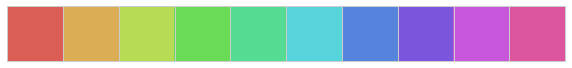

In [17]:
sns.palplot(sns.color_palette("hls",10 ))

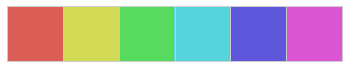

In [13]:
sns.palplot(sns.color_palette("hls",6 ))

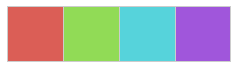

In [14]:
sns.palplot(sns.color_palette("hls",4 ))

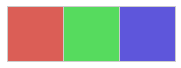

In [16]:
sns.palplot(sns.color_palette("hls",3 ))

In [ ]:
sns.palplot(mpl.rcParams['axes.color_cycle'])

In [ ]:
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.palplot(sns.cubehelix_palette(reverse=True))

In [ ]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True, edgecolor = "black")

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle